<a href="https://colab.research.google.com/github/FrankAst/Forecast-de-rendimientos-de-Soja/blob/main/preparacion_de_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import pandas as pd

In [ ]:
# prompt: i need to mount google drive so that I save a file at the end of the notebook

from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read measure files
df1 = pd.read_csv('/content/Exp. 205906-1.txt', delimiter='\t', encoding='latin1') # Changed encoding to 'latin1'
df2 = pd.read_csv('/content/Exp. 205906-2.txt', delimiter='\t', encoding='latin1') # Changed encoding to 'latin1'

In [ ]:
# Read stations file
df_3 = pd.read_excel('/content/estaciones smn PAIS - ABEL.xlsx')

In [ ]:
df_3.head()

,NRO INT,NRO CLIM,ESTACION,PROVINCIA,LAT,LONG,ALT (m)
0,87641,17375,AZUL AERO,BUENOS AIRES,-36.83212,-59.88642,147
1,87750,10221,BAHIA BLANCA AERO,BUENOS AIRES,-38.71474,-62.16304,83
2,87649,10008,BENITO JUAREZ AERO,BUENOS AIRES,-37.70129,-59.79106,207
3,87640,10544,BOLIVAR AERO,BUENOS AIRES,-36.18638,-61.07265,94
4,87570,10379,CAMPO DE MAYO AERO,BUENOS AIRES,-34.53591,-58.67500,26


In [ ]:
df1.head()

,Estacion,Fecha,Temp. Maxima (°C),Temp. Minima (°C),Precipitacion (mm),Hum. Relativa Media (%),Velocidad viento medio(m/s)
0,87540,1/1/1980,\N,\N,\N,\N,\N
1,87540,2/1/1980,\N,\N,\N,\N,\N
2,87540,3/1/1980,\N,\N,\N,\N,\N
3,87540,4/1/1980,\N,\N,\N,\N,\N
4,87540,5/1/1980,\N,\N,\N,\N,\N


In [ ]:
df2.head()

,Estacion,Fecha,Temp. Maxima (°C),Temp. Minima (°C),Precipitacion (mm),Hum. Relativa Media (%),Velocidad viento medio(m/s)
0,87540,1/1/2001,31.4,15,0,32,3.1
1,87540,2/1/2001,38.4,23.6,0,51,3.1
2,87540,3/1/2001,31,21.4,5,72,3.6
3,87540,4/1/2001,33.6,17.6,0,65,2.2
4,87540,5/1/2001,37,24.2,0,55,3.1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185784 entries, 0 to 185783
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Estacion                     185784 non-null  int64 
 1   Fecha                        185784 non-null  object
 2   Temp. Maxima (°C)            185784 non-null  object
 3   Temp. Minima (°C)            185784 non-null  object
 4   Precipitacion (mm)           185784 non-null  object
 5   Hum. Relativa Media (%)      185784 non-null  object
 6   Velocidad viento medio(m/s)  185784 non-null  object
dtypes: int64(1), object(6)
memory usage: 9.9+ MB


In [ ]:
df1 = df1.replace('\\N', pd.NA)
df2 = df2.replace('\\N', pd.NA)

In [ ]:
df1.isna().sum()

,0
Estacion,0
Fecha,0
Temp. Maxima (°C),20628
Temp. Minima (°C),20274
Precipitacion (mm),18208
Hum. Relativa Media (%),20512
Velocidad viento medio(m/s),20718


In [ ]:
# Removing nans

df1_clean = df1.dropna()

df2_clean = df2.dropna()

In [ ]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160698 entries, 60 to 185783
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Estacion                     160698 non-null  int64 
 1   Fecha                        160698 non-null  object
 2   Temp. Maxima (°C)            160698 non-null  object
 3   Temp. Minima (°C)            160698 non-null  object
 4   Precipitacion (mm)           160698 non-null  object
 5   Hum. Relativa Media (%)      160698 non-null  object
 6   Velocidad viento medio(m/s)  160698 non-null  object
dtypes: int64(1), object(6)
memory usage: 9.8+ MB


In [ ]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205106 entries, 0 to 222079
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Estacion                     205106 non-null  int64 
 1   Fecha                        205106 non-null  object
 2   Temp. Maxima (°C)            205106 non-null  object
 3   Temp. Minima (°C)            205106 non-null  object
 4   Precipitacion (mm)           205106 non-null  object
 5   Hum. Relativa Media (%)      205106 non-null  object
 6   Velocidad viento medio(m/s)  205106 non-null  object
dtypes: int64(1), object(6)
memory usage: 12.5+ MB


In [ ]:
# Append df2 after df1

df = pd.concat([df1_clean, df2_clean], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365804 entries, 0 to 365803
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Estacion                     365804 non-null  int64 
 1   Fecha                        365804 non-null  object
 2   Temp. Maxima (°C)            365804 non-null  object
 3   Temp. Minima (°C)            365804 non-null  object
 4   Precipitacion (mm)           365804 non-null  object
 5   Hum. Relativa Media (%)      365804 non-null  object
 6   Velocidad viento medio(m/s)  365804 non-null  object
dtypes: int64(1), object(6)
memory usage: 19.5+ MB


In [ ]:
# Change Fecha data type to datetime

df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365804 entries, 0 to 365803
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Estacion                     365804 non-null  int64         
 1   Fecha                        365804 non-null  datetime64[ns]
 2   Temp. Maxima (°C)            365804 non-null  object        
 3   Temp. Minima (°C)            365804 non-null  object        
 4   Precipitacion (mm)           365804 non-null  object        
 5   Hum. Relativa Media (%)      365804 non-null  object        
 6   Velocidad viento medio(m/s)  365804 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 19.5+ MB


In [ ]:
# Create Month, Year variables from date

df['Month'] = df['Fecha'].dt.month
df['Year'] = df['Fecha'].dt.year

df.insert(2, 'Month', df.pop('Month'))
df.insert(3, 'Year', df.pop('Year'))

df.head()

,Estacion,Fecha,Month,Year,Temp. Maxima (°C),Temp. Minima (°C),Precipitacion (mm),Hum. Relativa Media (%),Velocidad viento medio(m/s)
0,87540,1980-03-01,3,1980,29.9,16.1,0,59,2.6
1,87540,1980-03-02,3,1980,31.7,11.8,0,52,3.1
2,87540,1980-03-03,3,1980,30.4,16.6,0,48,6.7
3,87540,1980-03-04,3,1980,29,18.6,54,72,7.5
4,87540,1980-03-05,3,1980,25,16.4,0.4,88,3.6


In [ ]:
df1['Estacion'].value_counts()

,count
Estacion,
87540,7671
87596,7671
87692,7671
87688,7671
87679,7671
87663,7671
87648,7671
87645,7671
87641,7671


In [ ]:
df2['Estacion'].value_counts().shape

(27,)

In [ ]:
# prompt: I need to bring the ESTACION and PROVINCIA from df_3 to df joining by Estacion on both datasets. I need these 2 variables to be inserted after Estacion.
# it must be a left join.
# On df_3 the field is ESTACION while on df is Estacion


# Merge the dataframes
df = pd.merge(df, df_3[['NRO INT','ESTACION', 'PROVINCIA']], left_on='Estacion', right_on= df_3.columns[0], how='left')

# Insert PROVINCIA after Estacion
cols = list(df.columns)
prov_index = cols.index('Estacion') + 1
df.insert(prov_index, 'PROVINCIA', df.pop('PROVINCIA'))
estac_index = cols.index('Estacion') + 2
df.insert(estac_index, 'ESTACION', df.pop('ESTACION'))

#Drop ESTACION column
df = df.drop('Estacion', axis=1)

df.head()

,PROVINCIA,ESTACION,Fecha,Month,Year,Temp. Maxima (°C),Temp. Minima (°C),Precipitacion (mm),Hum. Relativa Media (%),Velocidad viento medio(m/s),NRO INT
0,BUENOS AIRES,TRENQUE LAUQUEN,1980-03-01,3,1980,29.9,16.1,0,59,2.6,87540
1,BUENOS AIRES,TRENQUE LAUQUEN,1980-03-02,3,1980,31.7,11.8,0,52,3.1,87540
2,BUENOS AIRES,TRENQUE LAUQUEN,1980-03-03,3,1980,30.4,16.6,0,48,6.7,87540
3,BUENOS AIRES,TRENQUE LAUQUEN,1980-03-04,3,1980,29,18.6,54,72,7.5,87540
4,BUENOS AIRES,TRENQUE LAUQUEN,1980-03-05,3,1980,25,16.4,0.4,88,3.6,87540


In [ ]:
df['PROVINCIA'].value_counts()

,count
PROVINCIA,
BUENOS AIRES,333755
CAPITAL FEDERAL,32049


# Seleccion de zonas de interes:

* Provincia Buenos aires:


In [ ]:
# Seleccionamos las provincias de interes
provincias = ['BUENOS AIRES', 'SANTA FE', 'CORDOBA', 'ENTRE RIOS']
df = df[df['PROVINCIA'].isin(provincias)]

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 333755 entries, 0 to 365803
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   PROVINCIA                    333755 non-null  object        
 1   ESTACION                     333755 non-null  object        
 2   Fecha                        333755 non-null  datetime64[ns]
 3   Month                        333755 non-null  int32         
 4   Year                         333755 non-null  int32         
 5   Temp. Maxima (°C)            333755 non-null  object        
 6   Temp. Minima (°C)            333755 non-null  object        
 7   Precipitacion (mm)           333755 non-null  object        
 8   Hum. Relativa Media (%)      333755 non-null  object        
 9   Velocidad viento medio(m/s)  333755 non-null  object        
 10  NRO INT                      333755 non-null  int64         
dtypes: datetime64[ns](1), int32(2),

In [ ]:
df['PROVINCIA'].value_counts()

,count
PROVINCIA,
BUENOS AIRES,333755


### Matcheo de regiones con datos de rendimientos y datos de precipitaciones:

Se realiza un fuzzymatch entre los dataframes:

In [ ]:
# Define your list of matching values
match_values = [
    "AZUL",
    "BAHIA BLANCA",
    "BENITO JUAREZ",
    "BOLIVAR",
    "CORONEL PRINGLES",
    "CORONEL SUAREZ",
    "DOLORES",
    "JUNIN",
    "LA PLATA",
    "LAS FLORES",
    "MERLO",
    "MORON",
    "OLAVARRIA",
    "PEHUAJO",
    "PUNTA INDIO B.A.",
    "SAN FERNANDO",
    "TANDIL",
    "TRENQUE LAUQUEN",
    "TRES ARROYOS"
]
# # Primero se quita la palabra 'AERO' de cada estacion en el dataframe de variables meteorologicas:
df['ESTACION'] = df['ESTACION'].str.replace('AERO', '', regex=False).str.strip()

# Filter df to keep rows where 'ESTACION' is in the match_values list
df = df[df['ESTACION'].isin(match_values)]


# Optionally, check the result
print(df)
print("Number of matching rows:", df.shape[0])


           PROVINCIA         ESTACION      Fecha  Month  Year  \
0       BUENOS AIRES  TRENQUE LAUQUEN 1980-03-01      3  1980   
1       BUENOS AIRES  TRENQUE LAUQUEN 1980-03-02      3  1980   
2       BUENOS AIRES  TRENQUE LAUQUEN 1980-03-03      3  1980   
3       BUENOS AIRES  TRENQUE LAUQUEN 1980-03-04      3  1980   
4       BUENOS AIRES  TRENQUE LAUQUEN 1980-03-05      3  1980   
...              ...              ...        ...    ...   ...   
365799  BUENOS AIRES     BAHIA BLANCA 2023-12-27     12  2023   
365800  BUENOS AIRES     BAHIA BLANCA 2023-12-28     12  2023   
365801  BUENOS AIRES     BAHIA BLANCA 2023-12-29     12  2023   
365802  BUENOS AIRES     BAHIA BLANCA 2023-12-30     12  2023   
365803  BUENOS AIRES     BAHIA BLANCA 2023-12-31     12  2023   

       Temp. Maxima (°C) Temp. Minima (°C) Precipitacion (mm)  \
0                   29.9              16.1                  0   
1                   31.7              11.8                  0   
2                   30.4

In [ ]:
df['ESTACION'].value_counts()

,count
ESTACION,
JUNIN,16066
TANDIL,16021
PEHUAJO,15616
TRES ARROYOS,15529
AZUL,15525
LA PLATA,15474
LAS FLORES,15415
CORONEL SUAREZ,15352
PUNTA INDIO B.A.,15284


In [ ]:
df.shape

(251041, 11)

# Exploracion grafica - Temperaturas

In [ ]:
import matplotlib.pyplot as plt

def plot_max_temp(month, starting_year, df):
    """
    Plots the maximum temperature for a given month since a starting year.

    Args:
        month (int): The month to plot (1-12).
        starting_year (int): The starting year for the plot.
        df (pd.DataFrame): The DataFrame containing the temperature data.
    """
    # Filter data for the given month and starting year
    filtered_df = df[(df['Month'] == month) & (df['Year'] >= starting_year)]

    # Convert 'Temp. Maxima (°C)' to numeric, coercing errors to NaN
    filtered_df['Temp. Maxima (°C)'] = pd.to_numeric(filtered_df['Temp. Maxima (°C)'], errors='coerce')

    # Group by year and get the maximum temperature for each year
    max_temp_by_year = filtered_df.groupby('Year')['Temp. Maxima (°C)'].max()

    # Create the plot
    plt.figure(figsize=(15, 6))
    plt.plot(max_temp_by_year.index, max_temp_by_year.values, marker='o')
    plt.xlabel('Year')
    plt.ylabel('Maximum Temperature (°C)')
    plt.title(f'Maximum Temperature in Month {month} ({starting_year} - Present)')
    plt.xticks(max_temp_by_year.index, rotation=45, ha='right')
    plt.grid(True)

    # Add data labels to every other point
    for i in range(0, len(max_temp_by_year), 2):
        if pd.notna(max_temp_by_year.values[i]) and isinstance(max_temp_by_year.values[i], (int, float)):
            plt.text(max_temp_by_year.index[i], max_temp_by_year.values[i], f'{max_temp_by_year.values[i]:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Example usage:
# plot_max_temp(12, 1980, df)  # Plot for December since 1980

In [ ]:

def plot_avgmax_temp(month, starting_year, df):
    """
    Plots the avg temperature for a given month since a starting year.

    Args:
        month (int): The month to plot (1-12).
        starting_year (int): The starting year for the plot.
        df (pd.DataFrame): The DataFrame containing the temperature data.
    """
    # Filter data for the given month and starting year
    filtered_df = df[(df['Month'] == month) & (df['Year'] >= starting_year)]

    # Convert 'Temp. Maxima (°C)' to numeric, coercing errors to NaN
    filtered_df['Temp. Maxima (°C)'] = pd.to_numeric(filtered_df['Temp. Maxima (°C)'], errors='coerce')

    # Group by year and get the maximum temperature for each year
    max_temp_by_year = filtered_df.groupby('Year')['Temp. Maxima (°C)'].mean()

    # Create the plot
    plt.figure(figsize=(15, 6))
    plt.plot(max_temp_by_year.index, max_temp_by_year.values, marker='o')
    plt.xlabel('Year')
    plt.ylabel('Avg max Temperature (°C)')
    plt.title(f'Avg max Temperature in Month {month} ({starting_year} - Present)')
    plt.xticks(max_temp_by_year.index, rotation=45, ha='right')
    plt.grid(True)

    # Add data labels to every other point
    for i in range(0, len(max_temp_by_year), 2):
        if pd.notna(max_temp_by_year.values[i]) and isinstance(max_temp_by_year.values[i], (int, float)):
            plt.text(max_temp_by_year.index[i], max_temp_by_year.values[i], f'{max_temp_by_year.values[i]:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Example usage:
# plot_max_temp(12, 1980, df)  # Plot for December since 1980

## December

<ipython-input-64-3f1242908433>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Temp. Maxima (°C)'] = pd.to_numeric(filtered_df['Temp. Maxima (°C)'], errors='coerce')


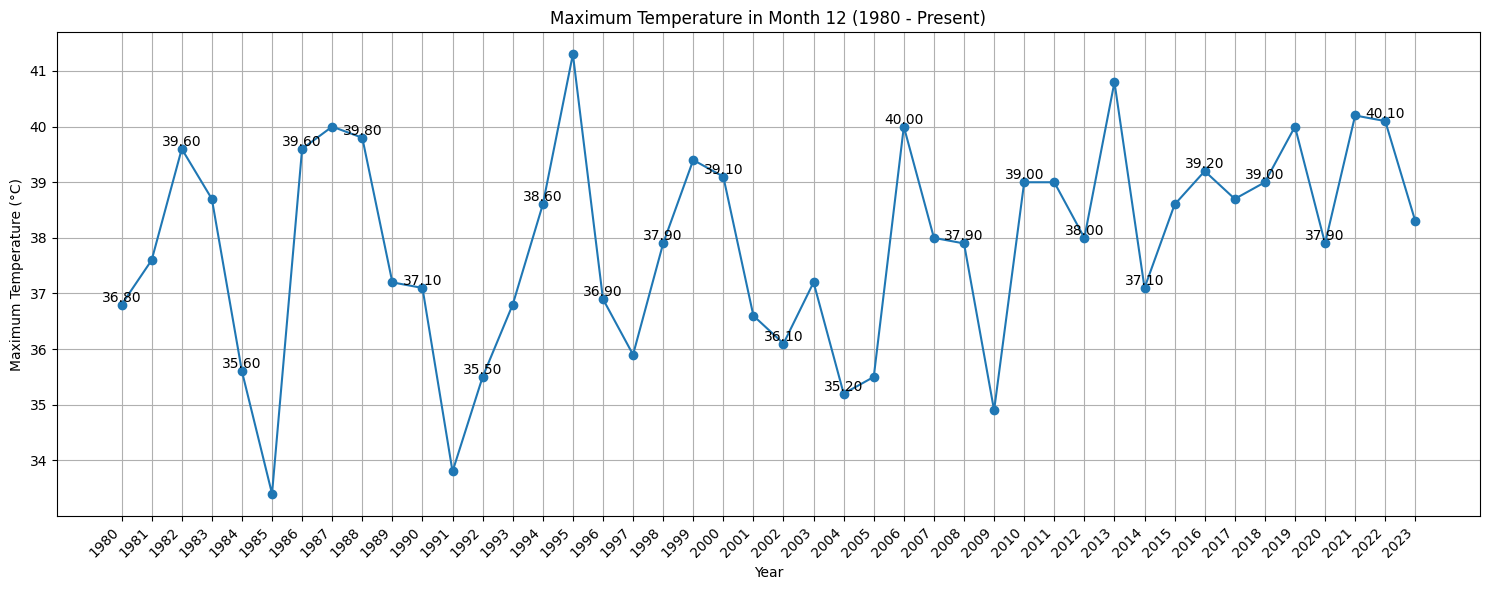

In [ ]:
plot_max_temp(12, 1980, df)  # Plot for December since 1980

<ipython-input-65-e6757f15f5ac>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Temp. Maxima (°C)'] = pd.to_numeric(filtered_df['Temp. Maxima (°C)'], errors='coerce')


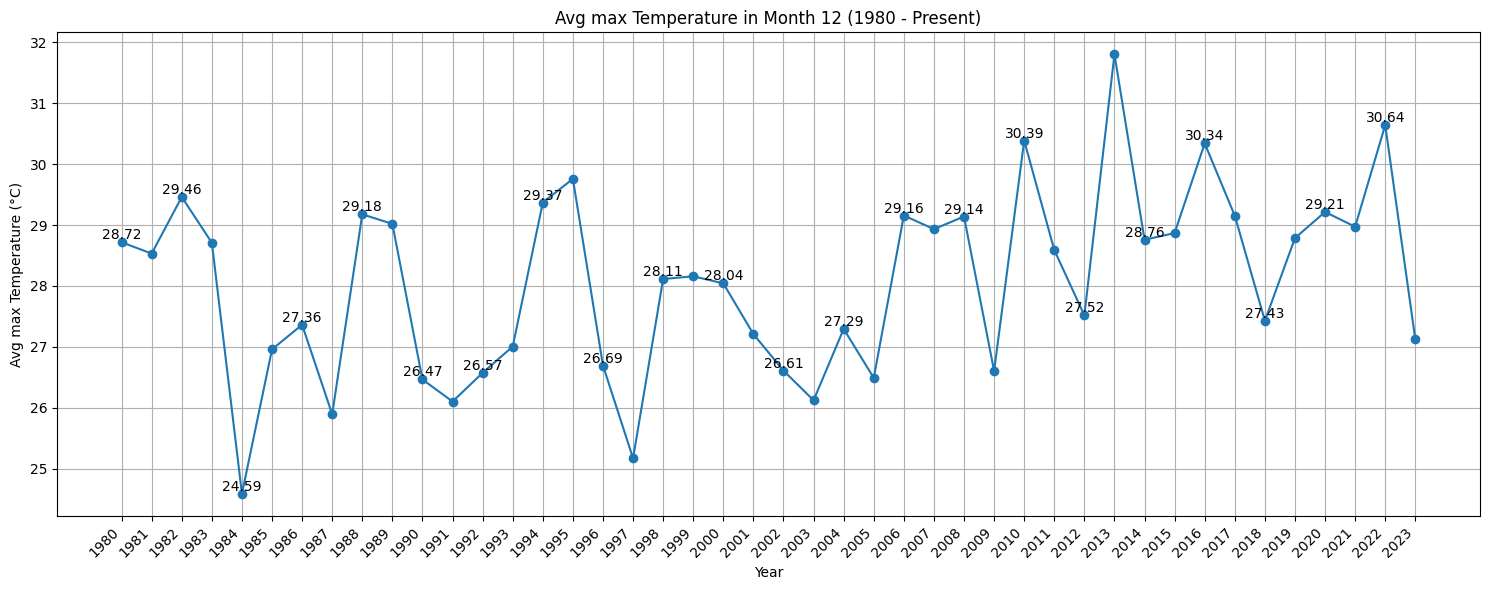

In [ ]:
plot_avgmax_temp(12,1980,df)

## January

<ipython-input-64-3f1242908433>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Temp. Maxima (°C)'] = pd.to_numeric(filtered_df['Temp. Maxima (°C)'], errors='coerce')


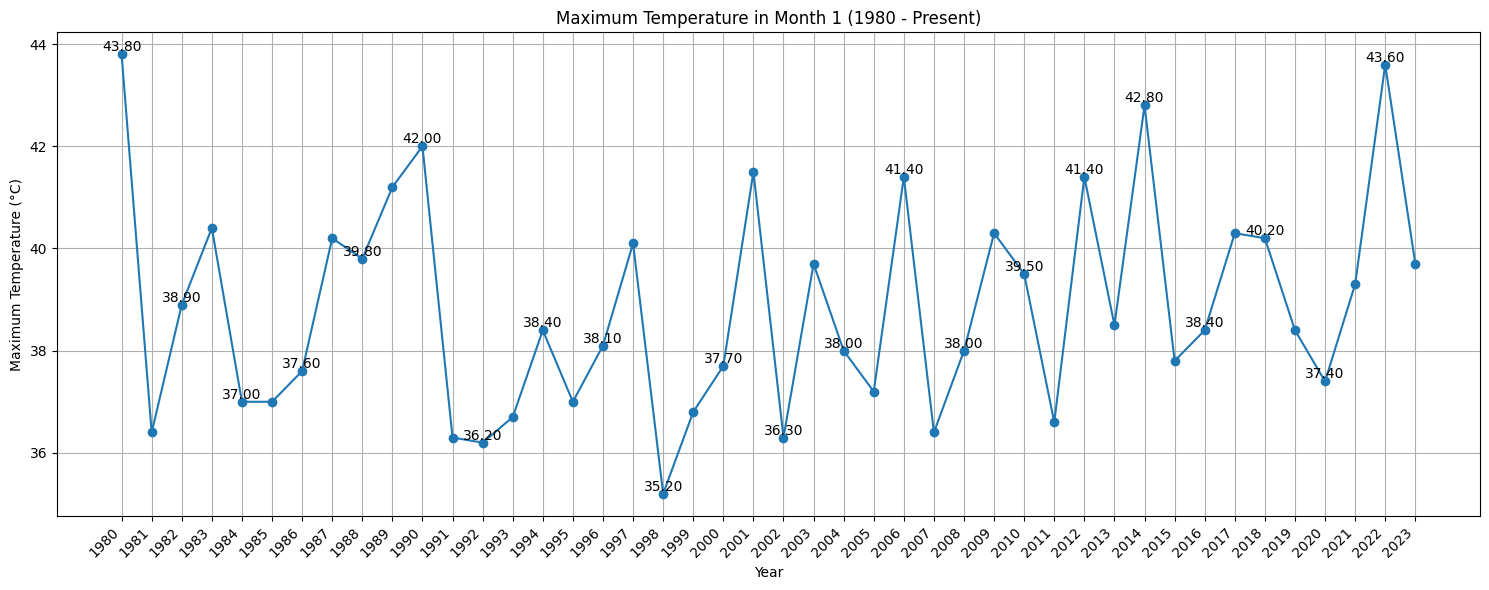

In [ ]:
plot_max_temp(1, 1980, df)

<ipython-input-65-e6757f15f5ac>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Temp. Maxima (°C)'] = pd.to_numeric(filtered_df['Temp. Maxima (°C)'], errors='coerce')


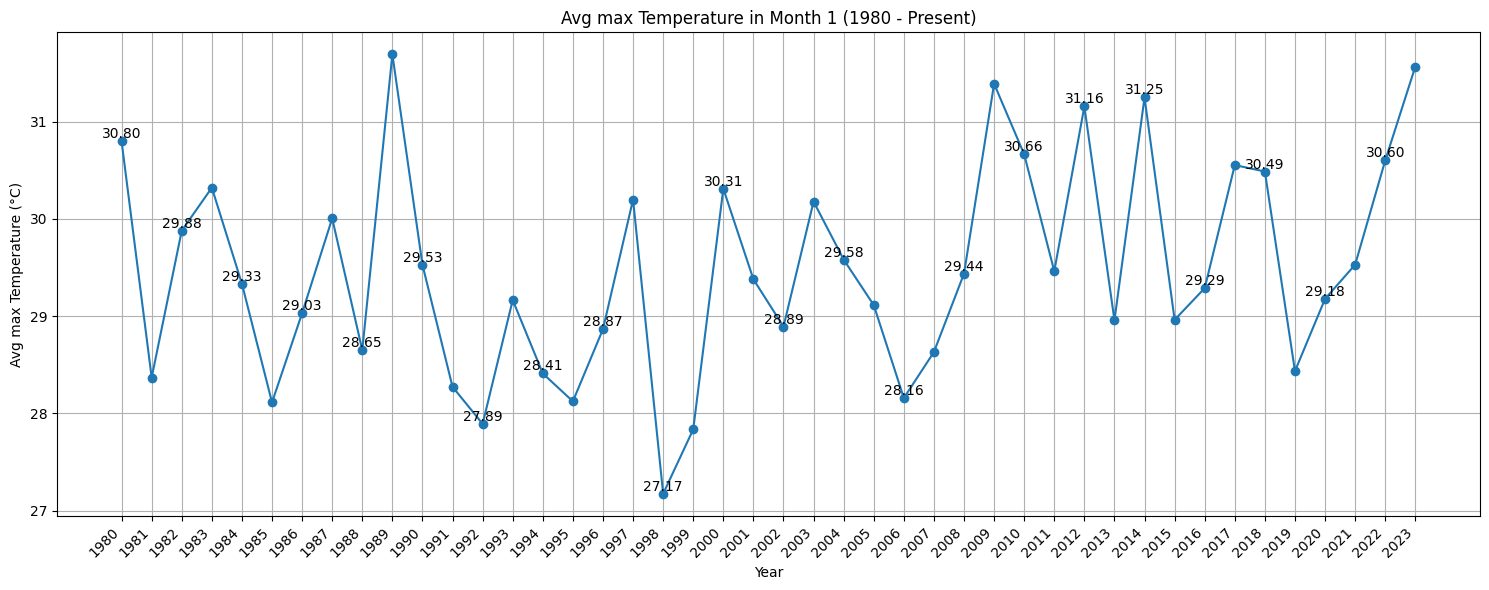

In [ ]:
plot_avgmax_temp(1,1980,df)

## February

<ipython-input-64-3f1242908433>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Temp. Maxima (°C)'] = pd.to_numeric(filtered_df['Temp. Maxima (°C)'], errors='coerce')


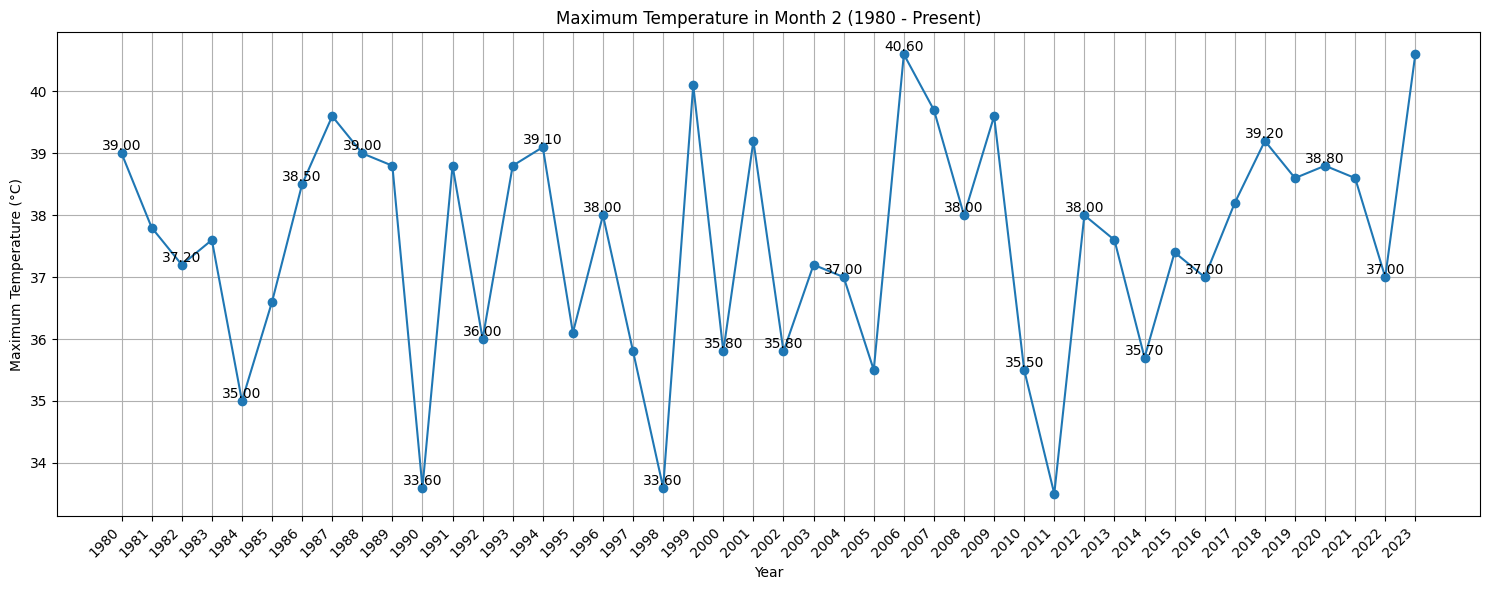

In [ ]:
plot_max_temp(2, 1980, df)  # Plot for December since 1980

<ipython-input-65-e6757f15f5ac>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Temp. Maxima (°C)'] = pd.to_numeric(filtered_df['Temp. Maxima (°C)'], errors='coerce')


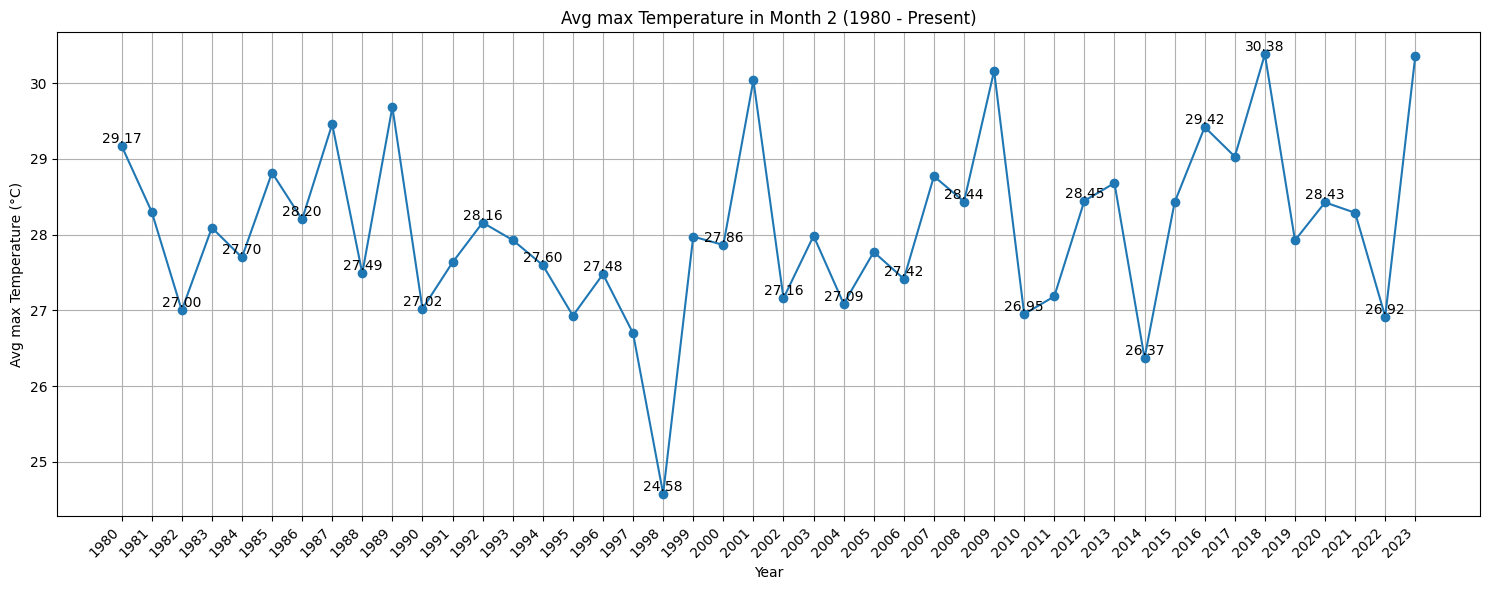

In [ ]:
plot_avgmax_temp(2,1980,df)

## March

<ipython-input-64-3f1242908433>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Temp. Maxima (°C)'] = pd.to_numeric(filtered_df['Temp. Maxima (°C)'], errors='coerce')


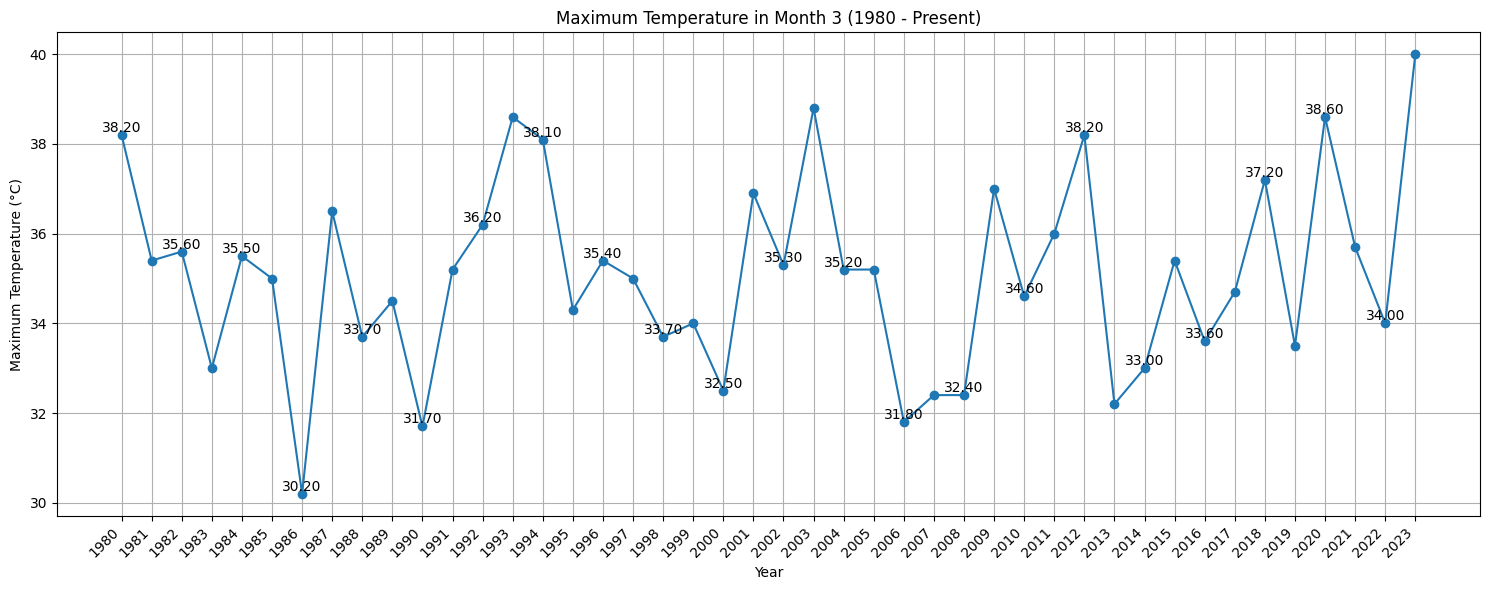

In [ ]:
plot_max_temp(3,1980,df)

<ipython-input-65-e6757f15f5ac>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Temp. Maxima (°C)'] = pd.to_numeric(filtered_df['Temp. Maxima (°C)'], errors='coerce')


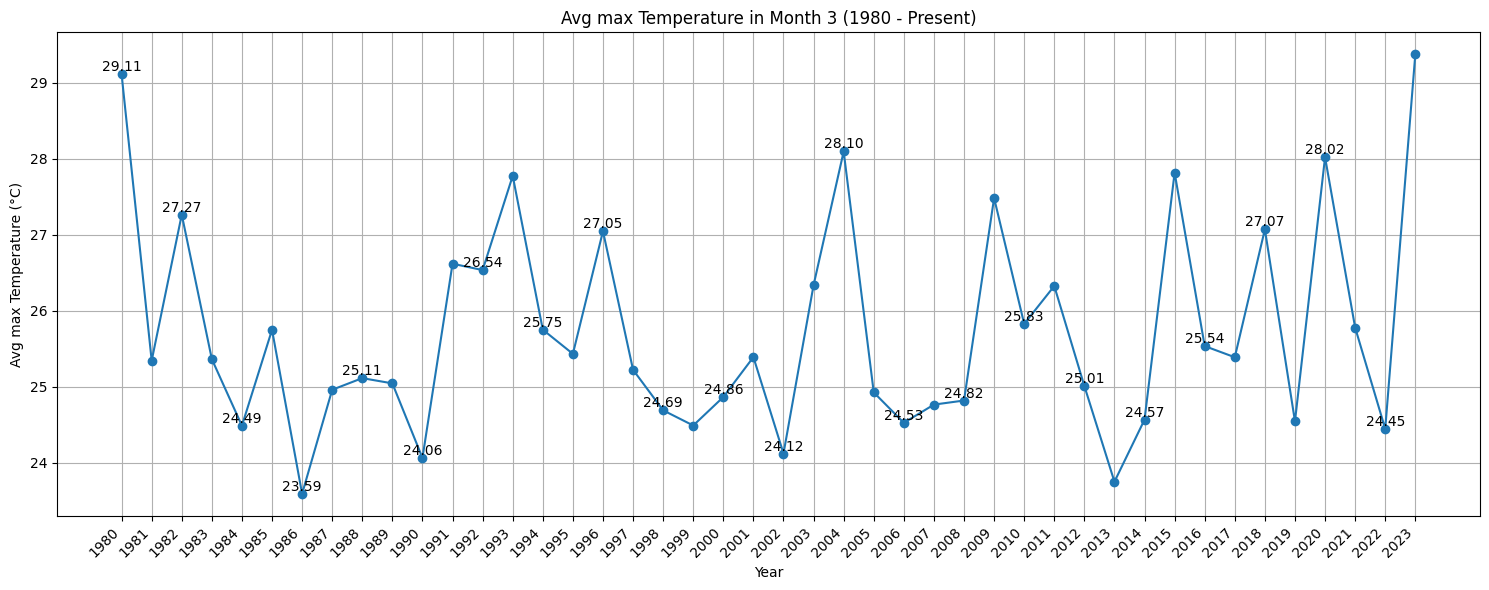

In [ ]:
plot_avgmax_temp(3,1980,df)

# Exploracion grafica - Precipitaciones

In [ ]:
# prompt: Create a function that receives month, starting year, and df. It should create a chart showing Precipitacion (mm) .sum() every 15 days.
# What I need is a line chart of a single variable (sum of precipitacion) grouped every 15 days.
# You are looping on the years, creating multiple lines in the chart. I want a SINGLE line across the years, where the x axis needs to show 2 labels per month month<day15 , month>day15

import pandas as pd
import matplotlib.pyplot as plt

def plot_precipitation(month, starting_year, df):
    """
    Plots the total precipitation every 15 days for a given month since a starting year.

    Args:
        month (int): The month to plot (1-12).
        starting_year (int): The starting year for the plot.
        df (pd.DataFrame): The DataFrame containing the precipitation data.
    """

    # Filter data for the given month and starting year
    filtered_df = df[(df['Month'] == month) & (df['Year'] >= starting_year)]

    # Convert 'Precipitacion (mm)' to numeric, coercing errors to NaN
    filtered_df['Precipitacion (mm)'] = pd.to_numeric(filtered_df['Precipitacion (mm)'], errors='coerce')

    # Create a '15-day period' column
    filtered_df['15-day period'] = (filtered_df['Fecha'].dt.day - 1) // 15

    # Group by year and 15-day period, then sum precipitation
    precipitation_by_period = filtered_df.groupby(['Year', '15-day period'])['Precipitacion (mm)'].sum().reset_index()

    # Create custom x-axis labels
    x_labels = []
    for year in precipitation_by_period['Year'].unique():
        for period in precipitation_by_period[precipitation_by_period['Year'] == year]['15-day period'].unique():
            label = f"{year}-{month}"
            if period == 0:
                label += "-<15"
            else:
                label += "->15"
            x_labels.append(label)

    # Create the plot
    plt.figure(figsize=(15, 6))
    plt.plot(x_labels, precipitation_by_period['Precipitacion (mm)'], marker='o')
    plt.xlabel('Year-Month-Period')
    plt.ylabel('Total Precipitation (mm)')
    plt.title(f'Total Precipitation in Month {month} ({starting_year} - Present)')
    plt.xticks(rotation=90, ha='right')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_precip(month, starting_year, df):
    """
    Plots the sum of precipitation for a given month since a starting year.

    Args:
        month (int): The month to plot (1-12).
        starting_year (int): The starting year for the plot.
        df (pd.DataFrame): The DataFrame containing the temperature data.
    """
    # Filter data for the given month and starting year
    filtered_df = df[(df['Month'] == month) & (df['Year'] >= starting_year)]

    # Convert 'Temp. Maxima (°C)' to numeric, coercing errors to NaN
    filtered_df['Precipitacion (mm)'] = pd.to_numeric(filtered_df['Precipitacion (mm)'], errors='coerce')

    # Group by year and get the maximum temperature for each year
    sum_preci_by_year = filtered_df.groupby('Year')['Precipitacion (mm)'].sum()

    # Create the plot
    plt.figure(figsize=(15, 6))
    plt.plot(sum_preci_by_year.index, sum_preci_by_year.values, marker='o')
    plt.xlabel('Year')
    plt.ylabel('Precipitacion (mm)')
    plt.title(f'Precipitacion (mm) in Month {month} ({starting_year} - Present)')
    plt.xticks(sum_preci_by_year.index, rotation=45, ha='right')
    plt.grid(True)

    # Add data labels to every other point
    for i in range(0, len(sum_preci_by_year), 2):
        if pd.notna(sum_preci_by_year.values[i]) and isinstance(sum_preci_by_year.values[i], (int, float)):
            plt.text(sum_preci_by_year.index[i], sum_preci_by_year.values[i], f'{sum_preci_by_year.values[i]:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

## December

<ipython-input-74-40ee905e2ec3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Precipitacion (mm)'] = pd.to_numeric(filtered_df['Precipitacion (mm)'], errors='coerce')
<ipython-input-74-40ee905e2ec3>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['15-day period'] = (filtered_df['Fecha'].dt.day - 1) // 15


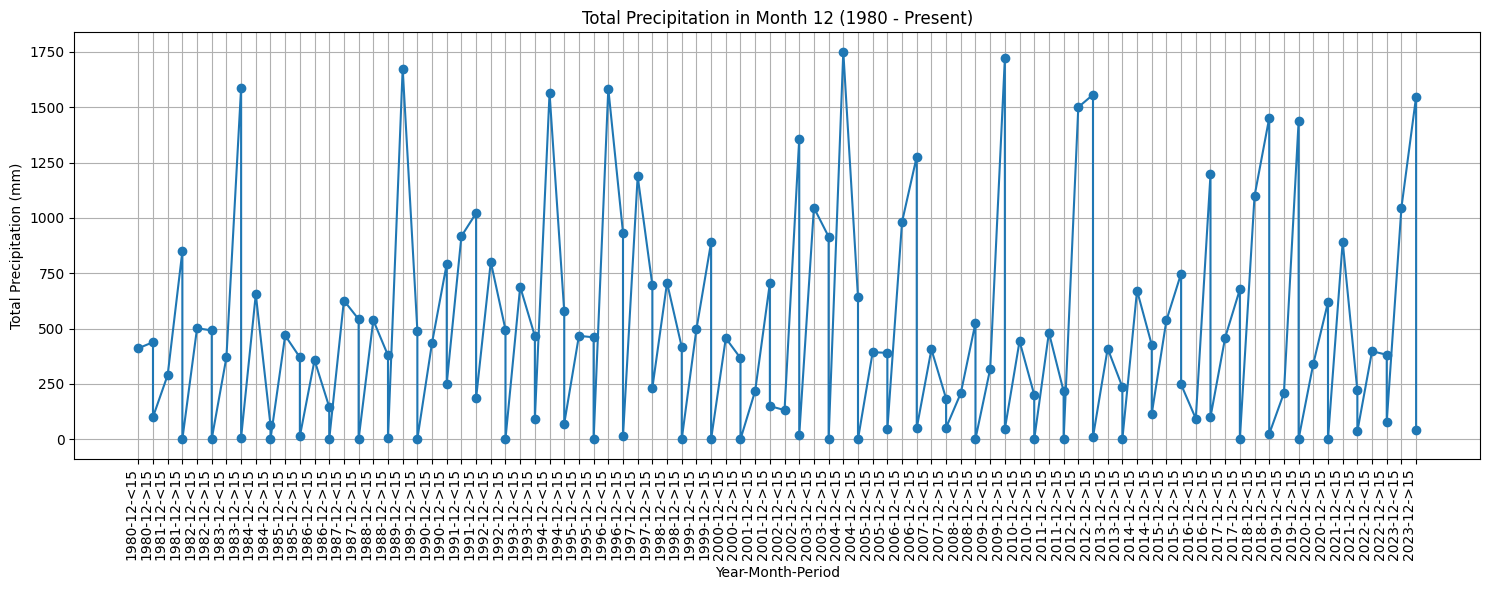

In [ ]:
plot_precipitation(12,1980,df)

<ipython-input-75-4da1894b3f32>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Precipitacion (mm)'] = pd.to_numeric(filtered_df['Precipitacion (mm)'], errors='coerce')


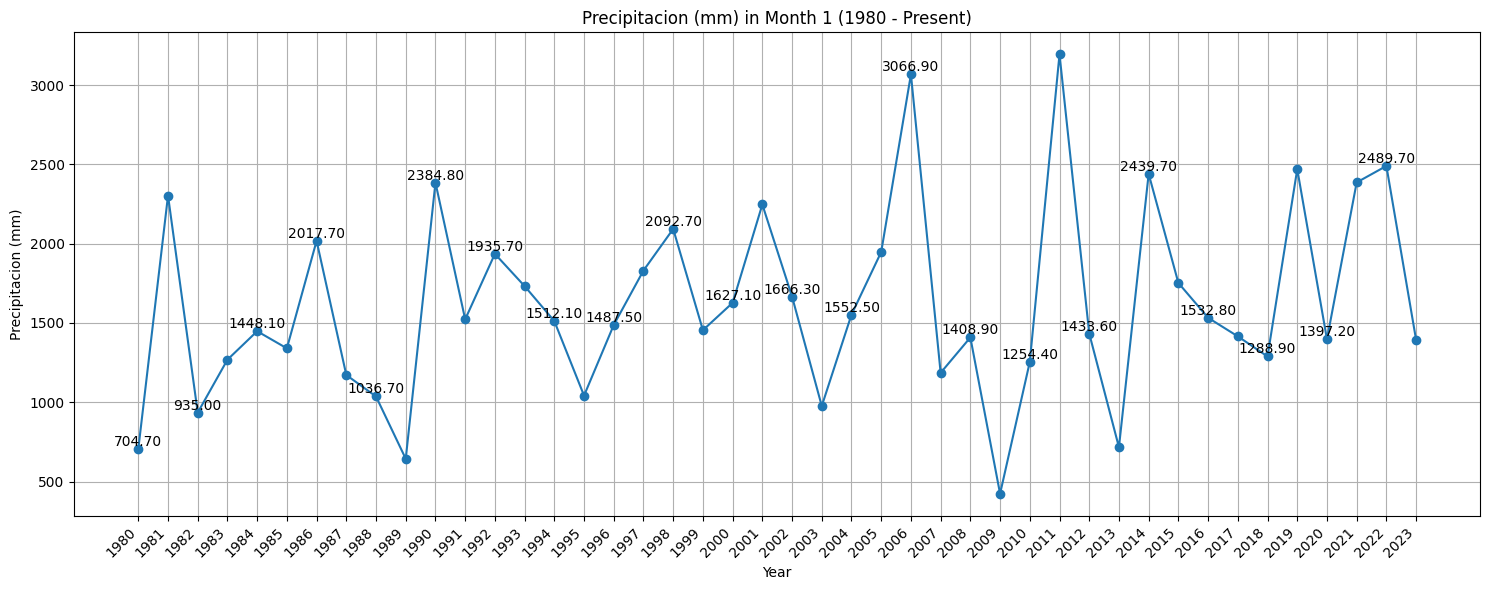

In [ ]:
plot_precip(1,1980,df)

## January

<ipython-input-74-40ee905e2ec3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Precipitacion (mm)'] = pd.to_numeric(filtered_df['Precipitacion (mm)'], errors='coerce')
<ipython-input-74-40ee905e2ec3>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['15-day period'] = (filtered_df['Fecha'].dt.day - 1) // 15


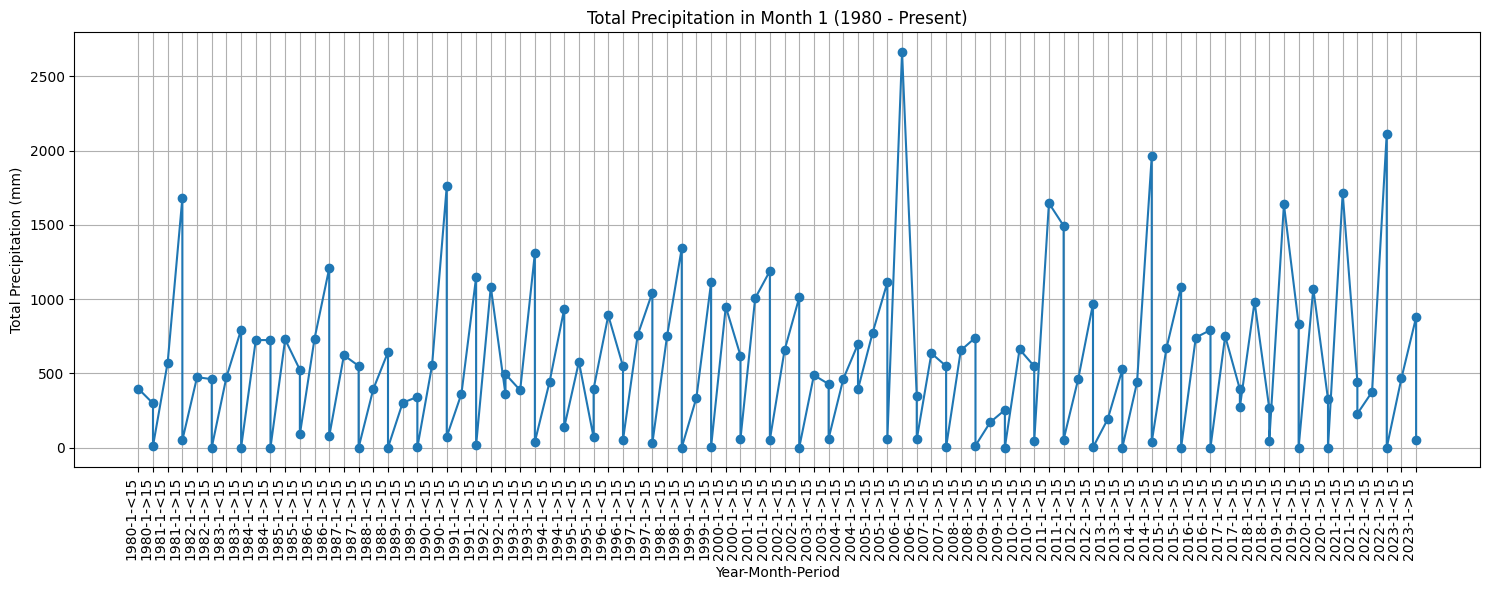

In [ ]:
plot_precipitation(1,1980,df)

## February

<ipython-input-74-40ee905e2ec3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Precipitacion (mm)'] = pd.to_numeric(filtered_df['Precipitacion (mm)'], errors='coerce')
<ipython-input-74-40ee905e2ec3>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['15-day period'] = (filtered_df['Fecha'].dt.day - 1) // 15


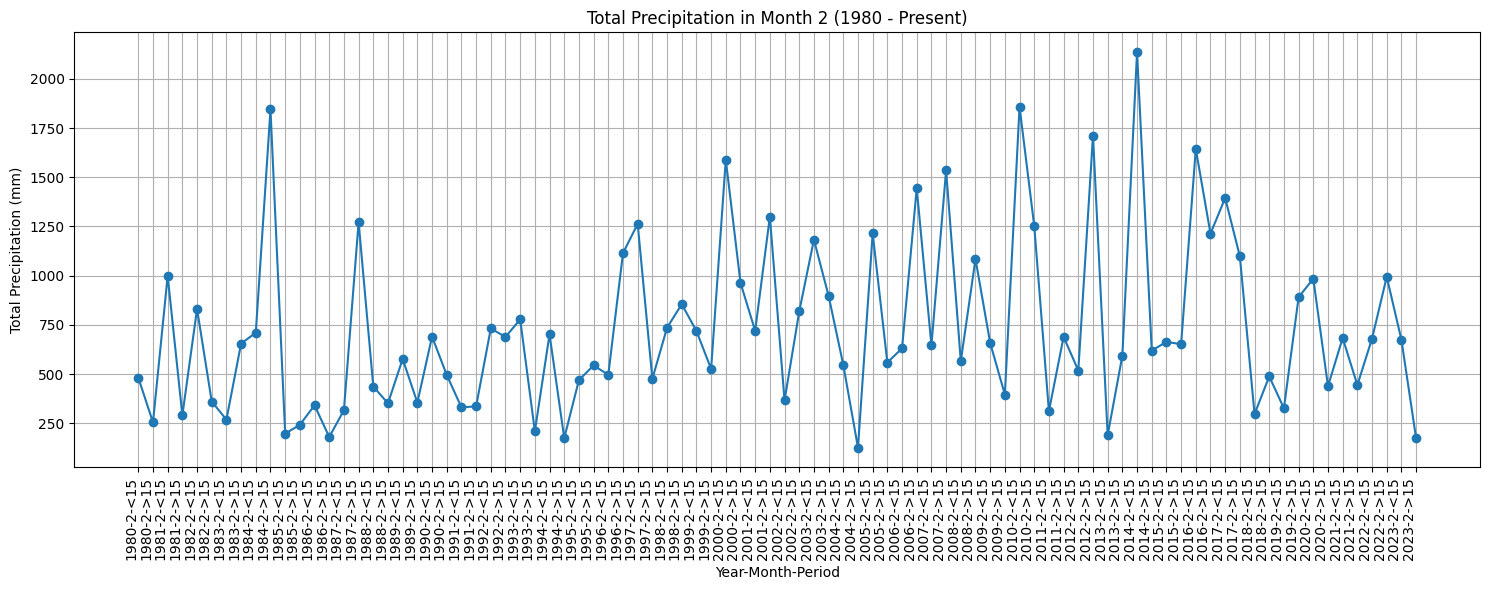

In [ ]:
plot_precipitation(2,1980,df)

## March

<ipython-input-74-40ee905e2ec3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Precipitacion (mm)'] = pd.to_numeric(filtered_df['Precipitacion (mm)'], errors='coerce')
<ipython-input-74-40ee905e2ec3>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['15-day period'] = (filtered_df['Fecha'].dt.day - 1) // 15


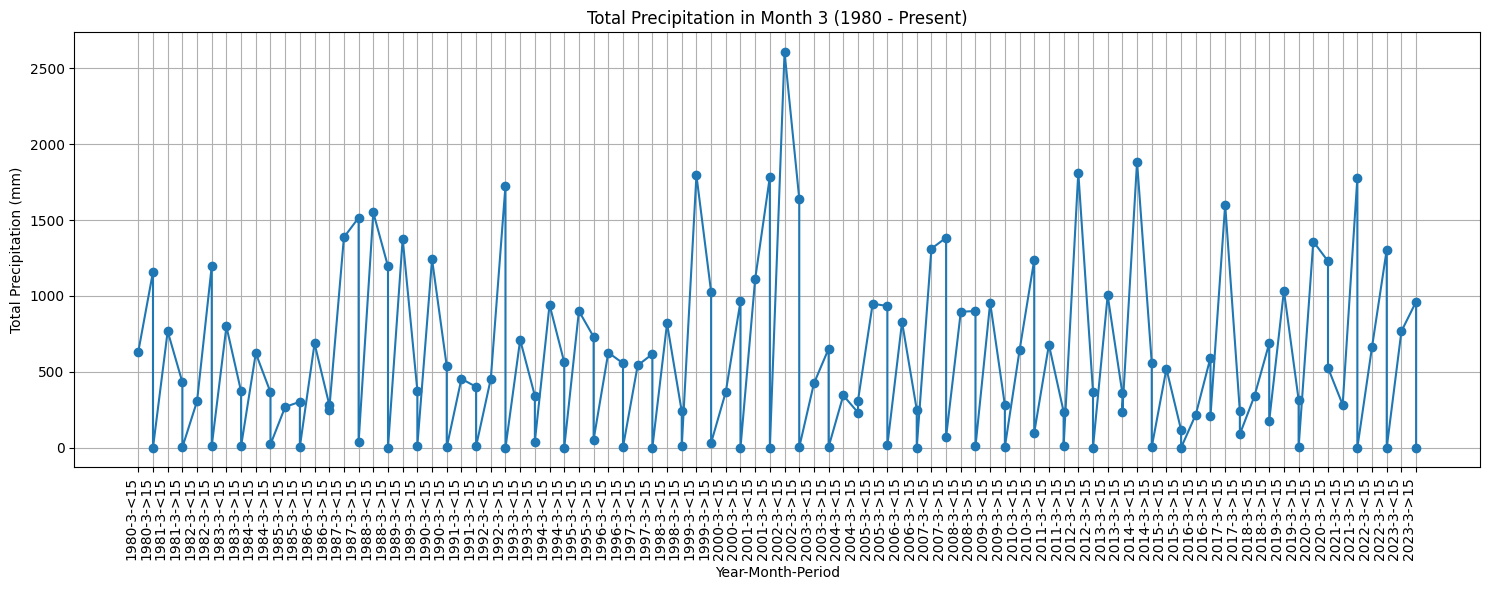

In [ ]:
plot_precipitation(3,1980,df)

# Feature Engineering

En esta seccion se transformaran las variables climaticas diarias en variables agregadas por campanias.

### Temperaturas y Precipitaciones

Se sabe que el crecimiento de la planta de soja ocurre durante Noviembre y Diciembre, siendo un periodo critico donde se requieren temperaturas entre 20 - 30 grados Celcius - y abundantes precipitaciones.

Durante enero y febrero, la planta florece y se forma el grano. Esta etapa necesita agua consistentemente y temperaturas adecuadas. En esta etapa se determina el rinde de la produccion.

Marzo y Abril, se seca la planta y el grano adquiere el % de humedad necesario. Pronto a ser consechada.


Para modelar las series, se utilizaran datos de los ultimos 4 meses de cada anio, donde se prepara la tierra y se realiza la siembra.

Se utilizara un ratio entre la temperatura maxima de cada dia y la amplitud termica de dicho dia. Luego se calculara un promedio cada 2 meses:
* Octubre - Novimebre
* Diciembre - Enero
* Febrero - Marzo



A fin de obtener una unica serie, la consutruccion final de la variable de temperatura para cada campania sera un promedio ponderado con los coeficientes:
* Octubre - Novimebre: 0.4
* Diciembre - Enero: 0.4
* Febrero - Marzo: 0.2


Para las precipitaciones, se calculara la media total de mm en cada par de meses:
* Octubre - Novimebre
* Diciembre - Enero
* Febrero - Marzo

Luego, se calculará un promedio ponderado con los coeficientes: 0.3, 0.5 y 0.2.

In [ ]:
# Ajustamos tipos de datos - temperatura y precipitaciones:

df['Temp. Maxima (°C)'] = pd.to_numeric(df['Temp. Maxima (°C)'], errors='coerce')
df['Temp. Minima (°C)'] = pd.to_numeric(df['Temp. Minima (°C)'], errors='coerce')
df['Precipitacion (mm)'] = pd.to_numeric(df['Precipitacion (mm)'], errors='coerce')

In [ ]:
# Creamos amplitud termica
df['ampl_termica'] = df['Temp. Maxima (°C)'] - df['Temp. Minima (°C)']

# Creamos ratio
df['ratio_temp'] = df['Temp. Maxima (°C)'] / df['ampl_termica']

df.head()

,PROVINCIA,ESTACION,Fecha,Month,Year,Temp. Maxima (°C),Temp. Minima (°C),Precipitacion (mm),Hum. Relativa Media (%),Velocidad viento medio(m/s),NRO INT,ampl_termica,ratio_temp
0,BUENOS AIRES,TRENQUE LAUQUEN,1980-03-01,3,1980,29.9,16.1,0.0,59,2.6,87540,13.8,2.166667
1,BUENOS AIRES,TRENQUE LAUQUEN,1980-03-02,3,1980,31.7,11.8,0.0,52,3.1,87540,19.9,1.592965
2,BUENOS AIRES,TRENQUE LAUQUEN,1980-03-03,3,1980,30.4,16.6,0.0,48,6.7,87540,13.8,2.202899
3,BUENOS AIRES,TRENQUE LAUQUEN,1980-03-04,3,1980,29.0,18.6,54.0,72,7.5,87540,10.4,2.788462
4,BUENOS AIRES,TRENQUE LAUQUEN,1980-03-05,3,1980,25.0,16.4,0.4,88,3.6,87540,8.6,2.906977


Notar que la campaña del 1979 y 2023 no estan completas.

In [ ]:
# prompt: Delete rows where 'ampl_termica' is 0 and print how many rows were deleted

# Delete rows where 'ampl_termica' is 0
rows_before = len(df)
df = df[df['ampl_termica'] != 0]
rows_after = len(df)
rows_deleted = rows_before - rows_after
print(f"{rows_deleted} rows were deleted.")

2 rows were deleted.


In [ ]:
# Dejo solo los meses 10,11, 12, 1, 2, 3
# months_to_keep = [11, 12, 1, 2, 3, 4]
# df = df[df['Month'].isin(months_to_keep)]


#months_to_keep = [7,8,9,10,11, 12]
months_to_keep = [10,11, 12,1,2,3]
df = df[df['Month'].isin(months_to_keep)]

In [ ]:
df.head()

,PROVINCIA,ESTACION,Fecha,Month,Year,Temp. Maxima (°C),Temp. Minima (°C),Precipitacion (mm),Hum. Relativa Media (%),Velocidad viento medio(m/s),NRO INT,ampl_termica,ratio_temp
0,BUENOS AIRES,TRENQUE LAUQUEN,1980-03-01,3,1980,29.9,16.1,0.0,59,2.6,87540,13.8,2.166667
1,BUENOS AIRES,TRENQUE LAUQUEN,1980-03-02,3,1980,31.7,11.8,0.0,52,3.1,87540,19.9,1.592965
2,BUENOS AIRES,TRENQUE LAUQUEN,1980-03-03,3,1980,30.4,16.6,0.0,48,6.7,87540,13.8,2.202899
3,BUENOS AIRES,TRENQUE LAUQUEN,1980-03-04,3,1980,29.0,18.6,54.0,72,7.5,87540,10.4,2.788462
4,BUENOS AIRES,TRENQUE LAUQUEN,1980-03-05,3,1980,25.0,16.4,0.4,88,3.6,87540,8.6,2.906977


In [ ]:
import numpy as np

# Creamos campo "campaña"
conditions = [
    df['Month'].isin([10, 11, 12]),   # Months 10-12: use current year and next year
    df['Month'].isin([1, 2, 3])       # Months 1-3: use previous year and current year
]

choices = [
    df['Year'].astype(str) + '/' + (df['Year'] + 1).astype(str).str[-2:],  # Format "YYYY/YYYY+1"
    (df['Year'] - 1).astype(str) + '/' + df['Year'].astype(str).str[-2:]    # Format "YYYY-1/YYYY"
]

# Create the new column
df['campaña'] = np.select(conditions, choices, default=np.nan)


## Creamos grupos de 2 meses:
conditions = [
    df['Month'].isin([10, 11]),          # Group 1
    df['Month'].isin([12, 1]),           # Group 2
    df['Month'].isin([2, 3])             # Group 3
]

choices = [1, 2, 3]

df['Two_Month_Group'] = np.select(conditions, choices, default=np.nan)


# # Agregamos por año y período
# grouped = df.groupby(['Year', 'Two_Month_Group']).agg(
#     avg_ratio_temp=('ratio_temp', 'mean'),
#     sum_precipitation=('Precipitacion (mm)', 'sum')
# ).reset_index()


df.head()

,PROVINCIA,ESTACION,Fecha,Month,Year,Temp. Maxima (°C),Temp. Minima (°C),Precipitacion (mm),Hum. Relativa Media (%),Velocidad viento medio(m/s),NRO INT,ampl_termica,ratio_temp,campaña,Two_Month_Group
0,BUENOS AIRES,TRENQUE LAUQUEN,1980-03-01,3,1980,29.9,16.1,0.0,59,2.6,87540,13.8,2.166667,1979/80,3.0
1,BUENOS AIRES,TRENQUE LAUQUEN,1980-03-02,3,1980,31.7,11.8,0.0,52,3.1,87540,19.9,1.592965,1979/80,3.0
2,BUENOS AIRES,TRENQUE LAUQUEN,1980-03-03,3,1980,30.4,16.6,0.0,48,6.7,87540,13.8,2.202899,1979/80,3.0
3,BUENOS AIRES,TRENQUE LAUQUEN,1980-03-04,3,1980,29.0,18.6,54.0,72,7.5,87540,10.4,2.788462,1979/80,3.0
4,BUENOS AIRES,TRENQUE LAUQUEN,1980-03-05,3,1980,25.0,16.4,0.4,88,3.6,87540,8.6,2.906977,1979/80,3.0


In [ ]:
grouped = df.groupby(['Year','Month','Two_Month_Group','campaña']).agg(
    avg_ratio_temp=('ratio_temp', 'mean'),
    sum_precipitation=('Precipitacion (mm)', 'sum')
).reset_index()

In [ ]:
grouped.tail()

,Year,Month,Two_Month_Group,campaña,avg_ratio_temp,sum_precipitation
259,2023,2,3.0,2022/23,2.139548,847.4
260,2023,3,3.0,2022/23,2.522496,1729.3
261,2023,10,1.0,2023/24,1.841098,956.7
262,2023,11,1.0,2023/24,1.949750,2132.7
263,2023,12,2.0,2023/24,2.333627,2635.3


In [ ]:
# prompt: drop rows where campaña has less than 5 repeated values

# Group by 'campaña' and count occurrences
campaign_counts = grouped['campaña'].value_counts()

# Filter out campaigns with less than 5 occurrences
campaigns_to_keep = campaign_counts[campaign_counts >= 5].index

# Filter the DataFrame
grouped = grouped[grouped['campaña'].isin(campaigns_to_keep)]


In [ ]:
grouped.head()

,Year,Month,Two_Month_Group,campaña,avg_ratio_temp,sum_precipitation
3,1980,10,1.0,1980/81,2.002585,948.0
4,1980,11,1.0,1980/81,2.284979,1777.7
5,1980,12,2.0,1980/81,2.254221,949.3
6,1981,1,2.0,1980/81,2.378294,2303.0
7,1981,2,3.0,1980/81,2.344551,1288.6


In [ ]:
# Calculamos ahora los promedios ponderados para cada campaña:

# Creamos los pesos:
#weights = {5: 0.4, 0: 0.4, 1: 0.2}
weights_temp = {1:0.4, 2: 0.4, 3:0.2}
weights_preci = {1:0.3, 2:0.5, 3:0.2}

# Definimos una función para calcular el promedio ponderado:

def weighted_average(group):
    weighted_ratio_temp = sum(
        group.loc[group['Two_Month_Group'] == g, 'avg_ratio_temp'].values[0] * w
        for g, w in weights_temp.items() if g in group['Two_Month_Group'].values
    )
    weighted_precipitation = sum(
        group.loc[group['Two_Month_Group'] == g, 'sum_precipitation'].values[0] * w
        for g, w in weights_preci.items() if g in group['Two_Month_Group'].values
    )
    return pd.Series({
        'weighted_avg_ratio_temp': weighted_ratio_temp,
        'weighted_sum_precipitation': weighted_precipitation
    })

# Group by 'campaña' and calculate weighted averages
result = grouped.groupby('campaña').apply(weighted_average).reset_index()

print(result)

    campaña  weighted_avg_ratio_temp  weighted_sum_precipitation
0   1980/81                 2.171633                     1016.77
1   1981/82                 1.992710                     1119.85
2   1982/83                 2.000268                     1139.26
3   1983/84                 2.335314                     2086.67
4   1984/85                 2.077524                      932.65
5   1985/86                 2.331170                     1092.63
6   1986/87                 2.326147                     1036.01
7   1987/88                 2.220702                     1075.70
8   1988/89                 2.004516                      941.53
9   1989/90                 2.220724                     1475.53
10  1990/91                 2.093964                     1456.60
11  1991/92                 2.158439                     1697.68
12  1992/93                 2.059319                     1275.37
13  1993/94                 2.145750                     1268.17
14  1994/95              

<ipython-input-91-302e5b0d89be>:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = grouped.groupby('campaña').apply(weighted_average).reset_index()


In [ ]:
# Borramos la primera campaña dado que solo tenemos los datos de 1980 en adelante

#result = result.drop(result.index[0])
result.head()


,campaña,weighted_avg_ratio_temp,weighted_sum_precipitation
0,1980/81,2.171633,1016.77
1,1981/82,1.992710,1119.85
2,1982/83,2.000268,1139.26
3,1983/84,2.335314,2086.67
4,1984/85,2.077524,932.65


In [ ]:
# Guardamos los resultados:

result.to_csv('result_octubre-Marzo.csv', index=False)

In [ ]:
# prompt: save results in google drive

# Assuming 'result' DataFrame is already created as in your provided code.

from google.colab import files

# Save to Google Drive
result.to_csv('/content/drive/MyDrive/result_octubre-Marzo.csv', index=False) # Change the path if needed

# Download the file to local machine (optional)
files.download('result_octubre-Marzo.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>